In [1]:
import warnings
import datetime

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from IPython.display import display, Markdown , Math 

sns.set()
warnings.filterwarnings('ignore')

In [2]:
def printmd(string): display(Markdown(string))
def latex(out): printmd(f'{out}')  
def pr(string): printmd('***{}***'.format(string))

In [1]:
def gradient_descent(X, y, W, b, step_size):
    ''''
    one iteration(Epoch) perform  gradient descent
    
     Parameters :
    X : ndarray
       train data
    y : ndarray
       target data
    W : ndarray
     weight matrix
    b : ndarray
      bias 
    step_size : float
       gradient descent setting
    
    '''
    P_y = softmax(X,W,b)-y
    W = W - step_size*(P_y.T).dot(X)
    b = b - step_size*np.sum(P_y, axis=0)
    return W,b
    

def train(X , y, max_iter=300,learning_rate=0.1,innitial_value =1, debug_W=None):
    '''
    Train by softmax regression 
    
    Parameters :
    X : ndarray
       train data
    y : ndarray
       target data
    max_iter : int 
        number of epoch (iterations)
        
    debug_W : tuple 
       index of weight parameter for debugging
    Returns 
       W, b : ndarray
         weight and bias
       in debug mode
       W, b, k : ndarray
          weight and bias and debugind parameter 
         
       
    '''
    
    if type(X) != np.ndarray or type(y) != np.ndarray: 
        raise ValueError('X and y must be ndarray')
        
    #init weight and bias
    b = np.full((y.shape[1],),innitial_value)
    W = np.full((y.shape[1], X.shape[1]), innitial_value)
    
    m = X.shape[0] 
    step_size = (1/m)*learning_rate
    
    if debug_W is not None: 
        debug_mode=True 
        debug = W[(debug_W)]
    else :
        debug_mode=False
        
    for i in range(max_iter):
        W,b = gradient_descent(X , y, W, b,step_size)
        if debug_mode: debug = np.append(debug, W[debug_W])   
    
    
    if debug_mode: return W,b,debug
        
    return W,b

das


<h1>
   <font size="5" face = "Times New Roma" color='#270336'>
     Principle Component Analisys
   </font> 
 </h1>

<h2>
  <p>
    <a href =   "https://github.com/daodavid" > 
       <img src="https://cdn.thenewstack.io/media/2014/12/github-octocat.png" align="left" width="120"  alt="daodavid" >
    </a>
    <font face = "Times New Roma" size="4"  color='#270336'>
        author: daodeiv (David Stankov) 
    </font>
</p>      
</h2>   

<h6>
  <font size="4" face = "Times New Roma" color='#3f134f' > 
    <ul style="margin-left: 30px">
      <li><a href='#abstract'>Abstract </a> </li> <br>
      <li><a href='#introduction'>Introduction </a> </li><br>
      <li><a href='#deff_softmax'>Softmaxt definition and  how it works?</a> </li><br>
      <li><a href='#cross_entropy'>Cross-entropy Loss</a> </li><br>  
      <li><a href='#optimization'>Optimization of softmax by Cross-entropy Loss and derivation of Gradient descent formula </a> </li><br>
       <li><a href='#gradient'>Implementation of Gradient descent algorithm </a> </li><br> 
      <li><a href='#reg'>Regularization of gradient descent by learning rate and max iterations</a> </li><br>     
       <li><a href='#conclusion'>Conclusion</a> </li><br>  
        
</ul>    
 </font>
  </h6>

<font size="1" id="abstract">... </font> 
<h2 face = "Times New Roma" color='#270336' >&nbsp; Abstract</h2>
<br>
<font face = "Times New Roma" size="4.5"  color='#270336' style="margin-right: 45px; margin-left: 45px" >
  &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; </font> <br>

<font size="1" id="introduction">... </font> 
<h2 face = "Times New Roma" color='#270336' >&nbsp; Introduction</h2>
<br>
<font face = "Times New Roma" size="4.5"  color='#270336' style="margin-right: 45px; margin-left: 45px" >
  &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; Blaa bla
</font> <br>

<font size="1" id="s">... </font> 
<h2 face = "Times New Roma" color='#270336' >&nbsp; Which is the most appropriate basis ?</h2>
<br>
<font face = "Times New Roma" size="4.5"  color='#270336' style="margin-right: 45px; margin-left: 45px" >
  &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;
    $\prime$
</font> <br>

In [7]:
f = lambda x : 2*x + np.random.uniform(-1.5,1.5)
x = np.linspace(-1.5,1.5)
y = [f(i) for i in x]

Text(0, 4, '$\\vec e_2$')

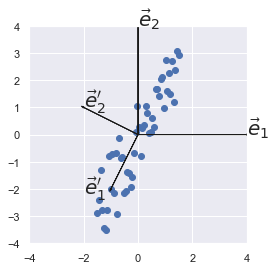

In [93]:
## fig = plt.figure(figsize=(10,10))
ax = plt.axes()
plt.xlim(-4,4)
plt.ylim(-4,4)
ax.set_aspect('equal')
ax.scatter(x,y)
ax.arrow(0, 0, -1, -2, head_width=0.05, head_length=0.1, fc='k', ec='k')
ax.arrow(0, 0, -2, 1, head_width=0.05, head_length=0.1, fc='k', ec='k')
plt.text( -2.0, -2.2,r'$\vec e_1^{\prime}$',fontsize=20)
plt.text( -2, 1,r'$\vec e_2^{\prime}$',fontsize=20)
ax.arrow(0, 0, 4, 0, head_width=0.05, head_length=0.1, fc='k', ec='k')
ax.arrow(0, 0, 0, 4, head_width=0.05, head_length=0.1, fc='k', ec='k')
plt.text( 4, 0,r'$\vec e_1$',fontsize=20)
plt.text(0, 4,r'$\vec e_2$',fontsize=20)
#https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.7-Eigendecomposition/

<p  class="improten"> Consider the following data.Each point(vector) here is represented using a linear combination of  $\vec e_1$ and  $\vec e_1$ axes  wich is written as $X_i=x_{i1}\vec e_1 +x_{i2}\vec e_2 $ ,here $.\vec e_i$ are the basic and $x_{i1},x_{i2}$ are co-cordinates.What of we choose a diferent basis.For example if we choose $\vec e_i^{\prime}$ instead $.\vec e_i$.We observe that every point has a very small component in $\vec e_2^{\prime}$ direction,maybe it is just a noice .It seems that the data which was originally represented in $.\vec e_i$ basis will be better represented in $\vec i^{\prime}$ basic, indeed it could be represented only in $\vec e_1^{\prime}$.Let's try stating this more formally.Why do not care about $\vec e_2^{\prime}$?. Because the variance in data in this direction is very small,this means all data have almost the same values in the $\vec e_2^{\prime}$ direction.If we were to build a classfier on the this data then the data on $\vec e_2^{\prime}$ would not contribute to the classifier as the point are not distinguishable along
this direction.In general, we are interested in representing the data using fewer dimensions such that the data has high variance along these dimensions.
 </p>

The dimensions are linearly independent (uncorrelated) (even better if they are orthogonal because that is a very convenient basis)


 !!!!Explanation of covariance matrix and why it gives the need measurments!!!!
 bla bla 
 bla bla
 Scaled mean value = 0

$$1)\Sigma = \frac{1}{m}X^T.X$$ <br>
Ideally our main pupose of PCA is to find the basis in which  the covariance $$\Sigma =\begin{bmatrix} \sigma_{11} & \sigma_{12} \\ \sigma_{21} & \sigma_{22}   \end{bmatrix} =\begin{bmatrix} \sigma_{11} &  0 \\ 0 & \sigma_{22}   \end{bmatrix} $$ and  $\sigma_{11},\sigma_{21}>0$ IN other words $\Sigma$ must be diagonal matrix

Let's investigate how the covariance is changing on different bases. <br>
Every data point is represent as $$2)\vec X_j = x_{ji}\vec e_{i}$$  or 
$$X_j=  \begin{bmatrix} x_{j1} & x_{j2}   \end{bmatrix}  \begin{bmatrix} e_{1}  \\ e_{2}   \end{bmatrix}$$
<br>
and the $e_{1}$ and $e_{3}$ can be represented in  $e_{1}^{\prime},e_{1}^{\prime}$
$$\begin{bmatrix} e_{1}  \\ e_{2}   \end{bmatrix} = \begin{bmatrix} T_{11} &  T_{12} \\ T_{21} & T_{22}   \end{bmatrix}$$
or  \br $$2)\vec e_{i} = T_{ik}\vec e_{k}^{\prime}  $$ where T is the transformation matrix in one basis to another

if we apply eq(2) to eq(1) we will get the new cordinate in basis $\vec e_{j}^{\prime}$  <br> 
$\vec X_j =x_{ji}\vec e_{i} =x_{ji}T_{ik}\vec e_{k}^{\prime} =x^{\prime}_{jk}\vec e_{k}  $ 
$$4)x^{\prime}_{jk} = x_{ji}T_{ik}$$
eq new cordinates in new basis
or $$5)X^{\prime} = X.T$$

The covariance matrix for new cordinates $X^{\prime}$ will be  <br>
$C^{\prime}= \Sigma^{\prime} = \frac{1}{m}X^{\prime T}X^{\prime} $ <br> <br>
$C^{\prime}= \Sigma^{\prime} =  \frac{1}{m}(X.T)^TXT $ <br>
$C^{\prime}= \Sigma^{\prime} = \frac{1}{m} (T)^TX^TXT $ (by applying (AB)^T = B^TA^T and eq(1)) <br>
$6)C^{\prime}= \Sigma^{\prime}=T^T\Sigma T$ the law of convesation of covariance matrix

as mention above our pupose is $\Sigma^{\prime}$ to be diagonal.

knowing that   $\Sigma$ can be eigen decomposed as $\Sigma = U\Lambda U^T$  where $\Lambda$ is diagonal matrix and $U$ eigen vectors and applying to 6) we get : <br>
  $\Sigma^{\prime} = T^T\Sigma T = T U\Lambda U^T.T $ if we choose our orthogonal matrix $T = U^T$ this means that $T.U^T=E=1$  we will get exatly what we want : <br>
  $\Sigma^{\prime} = T U\Lambda U^T.T = E.\Lambda.E = \Lambda$ <br>
  The above considering is the main gives that the our covariance matrix must be euqal to eigvenvalue diagonal matrix,and the most appropiriative basic is eiegen basis. 
   

let's apply above facts to our data


In [45]:
data = np.array([x,y]).T
data

array([[-1.5       , -2.8850222 ],
       [-1.43877551, -2.41285382],
       [-1.37755102, -1.31989769],
       [-1.31632653, -2.76772317],
       [-1.25510204, -3.44863901],
       [-1.19387755, -3.50003451],
       [-1.13265306, -2.77711483],
       [-1.07142857, -0.79915043],
       [-1.01020408, -2.01649353],
       [-0.94897959, -0.72913282],
       [-0.8877551 , -2.15257028],
       [-0.82653061, -0.6879188 ],
       [-0.76530612, -2.91389697],
       [-0.70408163, -0.1407721 ],
       [-0.64285714, -0.85628685],
       [-0.58163265, -0.83623655],
       [-0.52040816, -2.16653893],
       [-0.45918367, -2.06818216],
       [-0.39795918, -1.37318955],
       [-0.33673469, -1.39677765],
       [-0.2755102 , -1.91384179],
       [-0.21428571, -1.57473632],
       [-0.15306122, -0.6939318 ],
       [-0.09183673,  0.0837148 ],
       [-0.03061224,  1.06173495],
       [ 0.03061224,  0.27523682],
       [ 0.09183673, -0.77871305],
       [ 0.15306122,  0.23983549],
       [ 0.21428571,

In [46]:
cov = np.cov(data.T)
cov

array([[0.79654311, 1.49578079],
       [1.49578079, 3.38101099]])

In [53]:
#cov = 1/len(data[:,0])*(data.T.dot(T))
1/len(data[:,0])*data.T.dot(data)

array([[0.78061224, 1.46586517],
       [1.46586517, 3.33295047]])

In [95]:
values,vectors = np.linalg.eig(cov)
vectors = vectors.T

In [63]:
lambdas = np.diag(np.sort(values,axis=0))

In [68]:
np.flip(values)

array([4.06544817, 0.11210592])

Text(0, 4, '$\\vec e_2$')

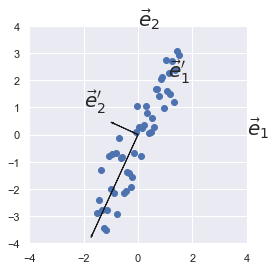

In [97]:

ax = plt.axes()
plt.xlim(-4,4)
plt.ylim(-4,4)
ax.set_aspect('equal')
ax.scatter(x,y)
#ax.arrow(0, 0, 1, 2, head_width=0.05, head_length=0.1, fc='k', ec='k')
#ax.arrow(0, 0, -2, 1, head_width=0.05, head_length=0.1, fc='k', ec='k')
plt.text( 1.1, 2.1,r'$\vec e_1^{\prime}$',fontsize=20)
plt.text( -2, 1,r'$\vec e_2^{\prime}$',fontsize=20)
ax.arrow(0, 0, vectors[0,0],vectors[0,1], head_width=0.05, head_length=0.1, fc='k', ec='k')
ax.arrow(0, 0, values[1]*vectors[1,0],values[1]*vectors[1,1], head_width=0.05, head_length=0.1, fc='k', ec='k')
#ax.arrow(0, 0, 0, 4, head_width=0.05, head_length=0.1, fc='k', ec='k')
plt.text( 4, 0,r'$\vec e_1$',fontsize=20)
plt.text(0, 4,r'$\vec e_2$',fontsize=20)


we find the basis